# Solution 2 - Timeseries
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

# Data
* This homework uses the file, `data/ols_forecasting_inflation_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

The data file contains...
* Macroeconomic Data
    - Core CPI price index, denoted as $p$. 
    - M2 Money Supply, denoted as $m$.
* Financial data
    - Returns on the S&P 500, (via the SPY ETF)
* See the “build data” folder for the details on how the data was constructed

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

# 1. Assessing the OLS Model

This problem considers the predictability of inflation over various horizons. To do so, note the following:
* $i_{t,t+h}$: Inflation is the h-period growth rate of CPI: 

$$i_{t,t+h} ≡ \frac{p_{t+h}}{p_t} − 1$$

* $g_{t,t+h}$: Money growth considered below is the growth rate of M2 Money supply:

$$g_{t,t+h} ≡ \frac{m_{t+h}}{m_t} − 1$$

## 1. 

Estimate an OLS regression to see if CPI and Money are contemporaneously correlated: 

$$p_t = \alpha + \beta m_t + \epsilon_t$$

* Note that this is not a lagged regression, but rather a contemporaneous time-series regression. (We are not predicting a period ahead but rather fitting one series to the other at the same time period.)

- (a) Report the estimated R-squared. 
- (b) Report the point-estimate of $\beta$.

## 2. 

This time, examine a regression of growth rates. Specifically, estimate an OLS regression to see if inflation and money growth are contemporaneously correlated:

$$i_{t,t+h} = \alpha + \beta g_{t,t+h} + \epsilon_{t,t+h}$$

* Note that this is not a lagged regression, but rather a regular time-series regression.

Answer the questions below for a one-year horizon: $h = 12$. 
- (a) Report the estimated R-squared.
- (b) Report the point-estimate of $\beta$.

## 3. 

The result of regressing inflation on money growth is very different from regressing CPI on Money. 

- (a) What do you conclude? 
- (b) Does it seem that variation in money contemporaneously explains variation in inflation?
- (c) In particular, what is wrong with one of the two regression models? Consider plotting the raw dependent and independent variable of each.

## 4.

Answer the remaining questions regarding the estimation of inflation on money growth in 1.2 above.

Do the sample residuals, $e$ seem to be iid? That is,
- (a) do they seem to be drawn from a constant variance? 
- (b) do they have serial correlation?

Assess this informally by plotting the time-series of estimated sample residuals, $e$.

## 5.


Suppose that the residuals do not fit the classic OLS assumptions. (Technically speaking, consider that they are heteroskedastic and have serial correlation.)

- (a) Report whether the estimates for $\alpha$ or $\beta$ are statistically significant relative to 0, for a significance level of 5%. (Check the reported p-value for each of the estimates, perhaps using stats-models OLS function.)
- (b) Do you have concerns about the accuracy of the reported p-values?
- (c) Do you have concerns about the estimated beta? For small samples, for large samples?

## 6. 

- (a) Assess the residuals with the Durbin-Watson test for serial correlation. 
- (b) Formally assess heteroskedasticity of the residuals with White’s test.

### Hints

- (a) This is reported by default in the stats-models OLS estimation summary. A value less than 2 would indicate potential issues with serial correlation.
- (b) See the documentation for the stats-model package.

## 7. 

Try redoing this entire problem, but this time with a lagged, forecasting regression instead of a contemporaneous regression. Namely, replace the equation in 1.2 with,

$$i_{t,t+h} = \alpha + \beta g_{t-h,t} + \epsilon_{t,t+h}$$

What do you think of the ability of past inflation and money growth to forecast future inflation?

### Hint
This should be easy to reform just this equation and then rerun the same code.

# <span style='color:red'>Solution 1</span>

In [1]:
import pandas as pd
import datetime

import numpy as np
import warnings

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               StrMethodFormatter,
                               AutoMinorLocator)

In [2]:
INFILE = '../data/ols_forecasting_inflation_data.xlsx'

In [3]:
data = pd.read_excel(INFILE,sheet_name='macro').set_index('date')
prices = data['CPI']
money = data['M2']

FREQ = 12

## <span style='color:red'>1.1</span>

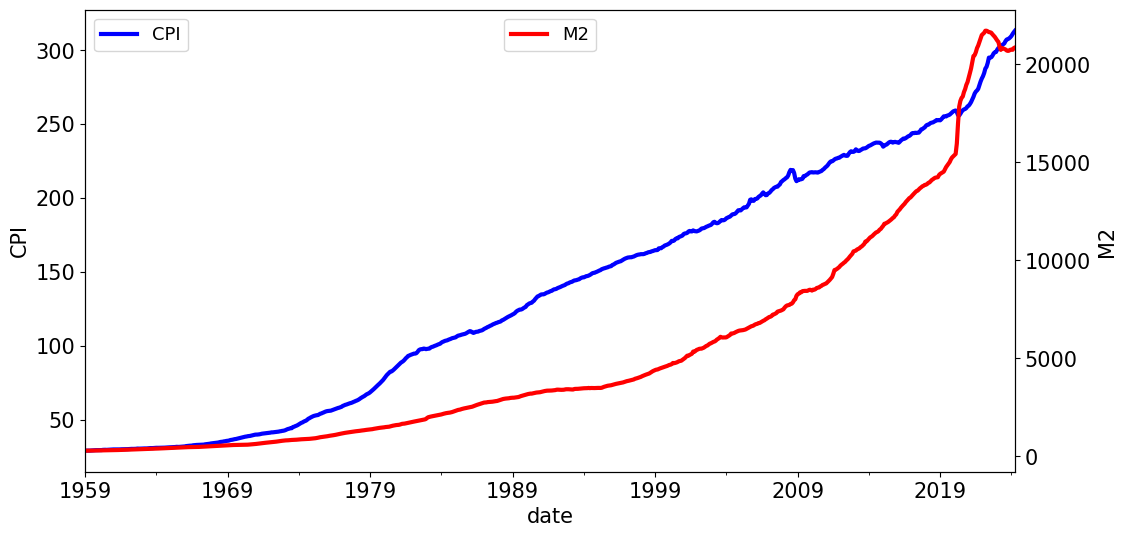

In [4]:
ax = data[['CPI']].plot(color='b',linewidth=3,ylabel='CPI',legend=['CPI'])
ax2 = plt.twinx(ax)
data[['M2']].plot(ax=ax2,color='r',linewidth=3,ylabel='M2',legend=['M2'])
plt.legend(loc='upper center')
plt.show()

In [5]:
LAG = FREQ

X = prices
y = money

results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M2   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3953.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          4.74e-308
Time:                        21:38:54   Log-Likelihood:                -7168.0
No. Observations:                 784   AIC:                         1.434e+04
Df Residuals:                     782   BIC:                         1.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3223.4621    157.390    -20.481      0.000   -3532.420   -2914.505
CPI           61.9215      0.985     62.876      0.000      59.988      63.855
==============================================================================
Omnibus:                      112.443   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.184
Skew:                           0.997   Prob(JB):                     1.35e-36
Kurtosis:                       4.041   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>1.2</span>

In [6]:
HORZ = FREQ

inflation = (prices / prices.shift(HORZ) -1).dropna()
money_growth = (money/money.shift(HORZ) - 1).dropna()

inflation.name = 'inflation'
money_growth.name = 'money growth'

X = money_growth
y = inflation

results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0700
Time:                        21:38:54   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0344      0.002     16.377      0.000       0.030       0.038
money growth     0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>1.3</span>

The results from the first regression, in levels, differ greatly from the results from the second regression, in growth rates.

* In the level regression, we get an r-squared near one and large, significant beta.

* In the growth-rate regression, we get an r-squared near zero, and small, insignificant beta.

This is because the level regression is trying to analyze data that have trends, and thus aren't stationary. The regression is finding the common trends in both series and interpreting that as a large explanatory power. This is an inappropriate model for trending data.

Using growth rates, we see that there is very little **contemporaneous** relation between money growth and inflation.

See 1.7 for a look at whether money growth and/or inflation can explain future values.

## <span style='color:red'>1.4</span>

In [7]:
results = sm.OLS(y,sm.add_constant(X)).fit()

e = results.resid

if len(e.shape)==1:
    e = pd.Series(e)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.293
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0700
Time:                        21:38:54   Log-Likelihood:                 1661.7
No. Observations:                 772   AIC:                            -3319.
Df Residuals:                     770   BIC:                            -3310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0344      0.002     16.377      0.000       0.030       0.038
money growth     0.0482      0.027      1.815      0.070      -0.004       0.100
==============================================================================
Omnibus:                      207.373   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.733
Skew:                           1.474   Prob(JB):                     1.33e-98
Kurtosis:                       5.307   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

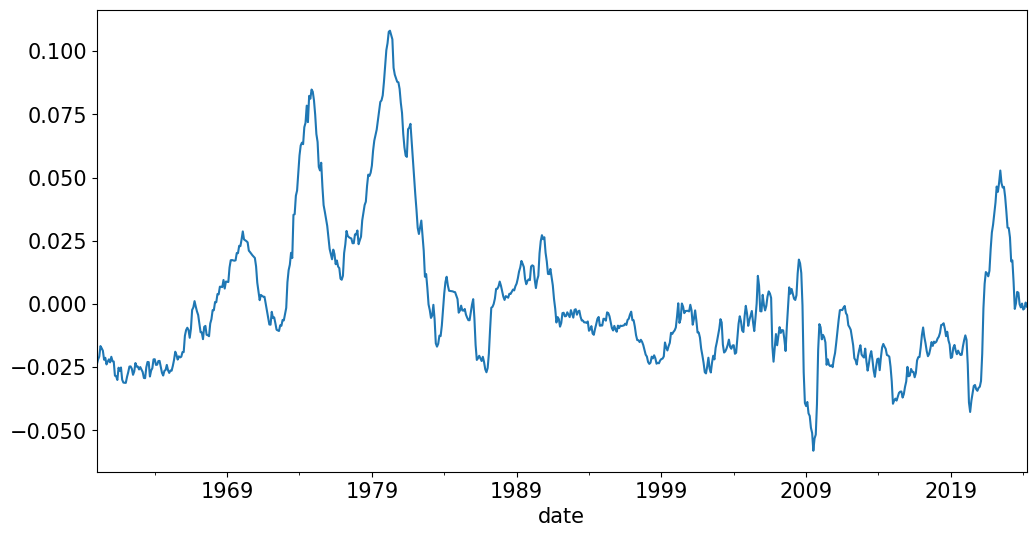

In [8]:
e.plot()
plt.show()

## <span style='color:red'>1.5</span>

Under the classic OLS assumptions, we find that for the growth-rate regression of 1.2...
* alpha is statistically significant, which simply confirms the series have different menas.
* beta is not statistically significant at the 5-percent level, (though it is at the 10-percent level.)

These p-values are dependent on OLS fitting the classic assumptions.
* This is a concern, as the data seemingly has heteroskedasticity, as well as serial correlation. Thus, we have reason to not trust the default, classic inference stats above.

The estimated beta and alpha are not impacted by the heteroskedasticy.
* The beta estimate might be consistent (diminishing bias in large samples.) But this depends on the nature of the serial correlation of the errors.
* As seen in the lecture discussion, we have more concerns about beta estimates being inconsistent, (biased even in large samples,) for autoregressions with AR serial correlation. 
* Here, we are regressing contemporaneously rather than on lags, so we can expect the beta estimates to avoid this problem.

## <span style='color:red'>1.6</span>

We clearly have serial correlation, as indicated by the Durbin-Watson test, and as indicated in the plot of the residuals.

White's test indicates clearly that there is heteroskedasticity.

## <span style='color:red'>1.7</span>

In [9]:
horizons = FREQ * np.array([1,2,3])
if 1 not in horizons:
    horizons = np.insert(horizons,0,1)

r2 = pd.DataFrame(index=pd.Index(horizons,name='horizon (months)'),columns=['inflation','money growth','both'],dtype=float)
betas_uni = r2[['inflation','money growth']].copy()
betas_multi = betas_uni.copy()

for LAG in horizons:

    inflation = (prices / prices.shift(LAG) -1).dropna()
    money_growth = (money/money.shift(LAG) - 1).dropna()
    inflation.name = 'inflation'
    money_growth.name = 'money growth'
    
    Xi,y = set_autoregressor(inflation,LAG)
    mod = LinearRegression().fit(Xi,y)    
    lab = r2.columns[0]
    r2.loc[LAG,lab] = mod.score(Xi,y)
    betas_uni.loc[LAG,lab] = mod.coef_
    
    Xm,y = set_autoregressor(money_growth,LAG)
    mod = LinearRegression().fit(Xm,y)
    lab = r2.columns[1]
    r2.loc[LAG,lab] = mod.score(Xm,y)
    betas_uni.loc[LAG,lab] = mod.coef_
        
    X = pd.DataFrame(index=inflation.index[LAG:],data=np.concatenate((Xi,Xm),axis=1),columns=['inflation','money growth'])
    y,X = inflation.align(X,join='inner')
    mod = LinearRegression().fit(X,y)
    lab = r2.columns[2]
    r2.loc[LAG,lab] = mod.score(X,y)
    betas_multi.loc[LAG,:] = mod.coef_

NameError: name 'set_autoregressor' is not defined

In [10]:
display(pd.concat([betas_uni,betas_multi],axis=1,keys=['univariate','multivariate']).style.set_caption('betas').format('{:.1%}'))
display(r2.style.set_caption('r-squared').format('{:.1%}'))

,inflation,money growth,both
horizon (months),,,
1,nan%,nan%,nan%
12,nan%,nan%,nan%
24,nan%,nan%,nan%
36,nan%,nan%,nan%


***

# 2 Models of Volatility

We will calculate a time-series of volatility estimates using a few different methods. For each, we use $\sigma_t$ to denote our estimate of the time-$t$ return volatility, as based on data over periods through $t-1$, but not including $t$ itself. 

This problem uses data from `data/ols_forecasting_inflation_data.xlsx`.

Estimate the following using the SPY return series. We use a common (but biased) version of the usual variance estimator by ignoring $\mu$ and dividing by the number of data points, rather than by the degrees of freedom. 

### Expanding Series
$$\begin{align*}
\sigma^2_{t} =& \frac{1}{t-1}\sum_{\tau=1}^{t-1} r_\tau ^ 2
\end{align*}$$

Begin the calculation at $t=61$, so that the first estimate is based on 60 data points.

### Rolling Window
\begin{align*}
\sigma^2_{t} =& \frac{1}{m}\sum_{l=1}^{m} r_{t-l}^2
\end{align*}
Use $m=60$, and begin the calculation at the $t=61$, (so that the calculation has a full 60 data points.) Consider using pandas method `df.rolling(60).std()`, where `df` is replaced by the name of your pandas dataframe.

### IGARCH 
(famously used in *JP Morgan's Risk Metrics*)
$$\begin{align*}
\sigma^2_{t} =& \theta \sigma^2_{t-1} + (1-\theta) r_{t-1}^2
\end{align*}$$

Rather than estimating $\theta$, simply use $\theta = 0.97$, and initialize with $\sigma_1 = 0.15\left(\frac{1}{\sqrt{12}}\right)$.


### GARCH(1,1)
$$\begin{align*}
\sigma^2_{t} =& \omega + \theta \sigma^2_{t-1} + \gamma r_{t-1}^2
\end{align*}$$

To estimate GARCH(1,1), try using the ARCH package in Python. The default estimation implementation is fine, (and will account for $\mu$ and degrees of freedom.) 

For each of these methods, 

## 2.1
Plot $\sigma_t$. (Plot the volatility, the square-root of the variance.)

## 2.2
Report the estimation for October 2008, April 2020, and May 2024.

***

# <span style='color:red'>Solution 2</span>

In [11]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

In [12]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from arch import arch_model
from arch.univariate import GARCH, EWMAVariance 

### Setup

In [13]:
spy = pd.read_excel(INFILE,sheet_name='s&p500').set_index('Date')
FREQ = 12

## <span style='color:red'>2.1</span>

### Initial Conditions

In [14]:
var_1 = (0.15 * (1 / (12**0.5)))**2
theta = 0.97

### Calculate the Expanding Series and Rolling Window estimates:

In [15]:
### Expanding Window
var = (spy**2).shift(1).expanding().mean().rename(columns={'SPY':'Expanding Window'})

### Rolling Window
var['Rolling Window'] = (spy**2).shift(1).rolling(5*FREQ).mean() 

### Using the arch package, fit a GARCH(1, 1) model. We will use the parameters generated to find our estimates:

In [16]:
GARCH = arch_model(spy, vol='Garch', p=1, o=0, q=1, dist='Normal')

GARCH_model = GARCH.fit()

GARCH_model.params

Iteration:      1,   Func. Count:      6,   Neg. LLF: 136905287.20325646
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1044759.9548106429
Iteration:      3,   Func. Count:     24,   Neg. LLF: -669.8186331265372
Iteration:      4,   Func. Count:     30,   Neg. LLF: 9212.798170910562
Iteration:      5,   Func. Count:     40,   Neg. LLF: 537.2601220639692
Iteration:      6,   Func. Count:     49,   Neg. LLF: -669.1535312645367
Iteration:      7,   Func. Count:     55,   Neg. LLF: -678.3262292913266
Iteration:      8,   Func. Count:     61,   Neg. LLF: -667.851868240446
Iteration:      9,   Func. Count:     67,   Neg. LLF: -679.1765228203155
Iteration:     10,   Func. Count:     73,   Neg. LLF: -679.1927990554591
Iteration:     11,   Func. Count:     79,   Neg. LLF: -679.2012046619566
Iteration:     12,   Func. Count:     84,   Neg. LLF: -679.2012683140181
Iteration:     13,   Func. Count:     88,   Neg. LLF: -679.2012683139549
Optimization terminated successfully    (Exit mode 0)


mu          0.010132
omega       0.000097
alpha[1]    0.193990
beta[1]     0.766856
Name: params, dtype: float64

We have $\theta$ so we do not need the step below to find our estimates. However, this is an example of how to use the arch package to fit an IGARCH model. The package has several methods that could be useful in other applications.

In [17]:
IGARCH = arch_model(spy)

IGARCH.volatility = EWMAVariance(theta)

IGARCH_model = IGARCH.fit()

IGARCH_model.params

Iteration:      1,   Func. Count:      3,   Neg. LLF: 2569432.4090324664
Iteration:      2,   Func. Count:     10,   Neg. LLF: -653.1424941911657
Optimization terminated successfully    (Exit mode 0)
            Current function value: -653.142494191251
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2


mu    0.008827
Name: params, dtype: float64

We calculate our variance estimates for the GARCH and IGARCH models:

In [18]:
var[['GARCH','IGARCH']] = None

### Initialize with the given parameter
var.iloc[0,2:] = var_1 

### Simulate the rest of the period using the initial variance given
for i in range(1, len(var)):
    ### Forecast variance by plugging the GARCH and IGARCH parameters into their respective equations
    var['IGARCH'].iloc[i] = var['IGARCH'].iloc[i-1] * theta + (1-theta)*(spy.iloc[i-1,0]**2)
    var['GARCH'].iloc[i] = GARCH_model.params['omega'] + var['GARCH'].iloc[i-1] * GARCH_model.params['beta[1]'] + GARCH_model.params['alpha[1]']*(spy.iloc[i-1,0]**2)
    
var = var.dropna()

var.tail() * FREQ

,Expanding Window,Rolling Window,GARCH,IGARCH
Date,,,,
2024-01-31,0.023259,0.035861,0.033453,0.031892
2024-02-29,0.023205,0.034629,0.027413,0.031026
2024-03-31,0.023230,0.034964,0.028531,0.031076
2024-04-30,0.023202,0.035112,0.025537,0.030529
2024-05-31,0.023193,0.035104,0.024537,0.030198


Let's plot our volatility estimates now:

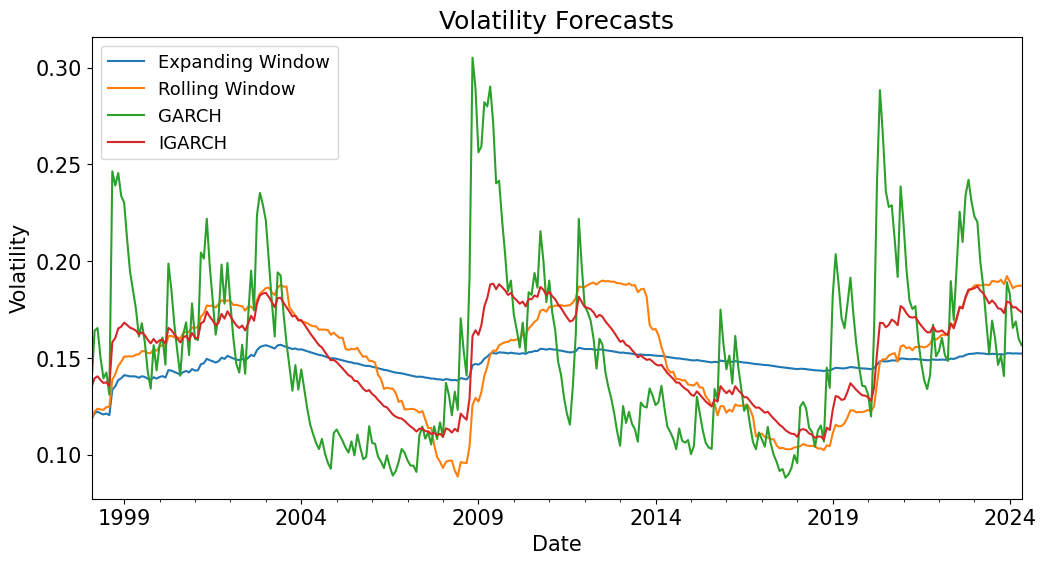

In [19]:
### Convert variance to volatility
vol = (var * FREQ)**.5

vol.plot()
plt.title('Volatility Forecasts')
plt.ylabel('Volatility')

plt.show()

## <span style='color:red'>2.2</span>

In [20]:
dts = ['2008-11-30','2020-03-31','2024-05-31']
vol.loc[dts]

,Expanding Window,Rolling Window,GARCH,IGARCH
Date,,,,
2008-11-30,0.146284,0.125706,0.305119,0.161393
2020-03-31,0.144813,0.124986,0.163601,0.134557
2024-05-31,0.152291,0.187360,0.156642,0.173776
